Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [2]:
import nsfg
import thinkplot
import thinkstats2
df = nsfg.ReadFemPreg()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = df[(df.agepreg >= 0) & (df.agepreg < 45)].dropna(subset=['agepreg', 'totalwgt_lb'])

In [5]:
weight = df.totalwgt_lb
m_age = df.agepreg

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


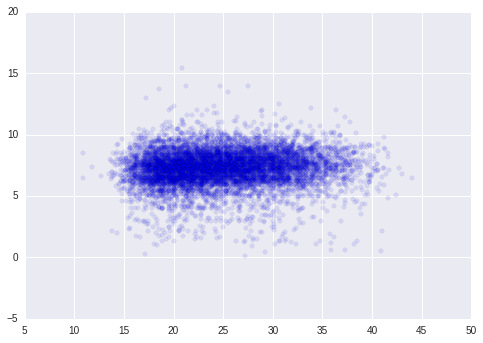

In [6]:
plt.scatter(m_age, weight, alpha=0.1)
# plt.hexbin(m_age, weight, gridsize=30, cmap=plt.cm.summer)
# plt.xlabel("Age"); plt.ylabel('Birth Weight')

In [7]:
bins = np.arange(10, 45, 2.5)
indices = np.digitize(m_age, bins)
groups = df.groupby(indices)
ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

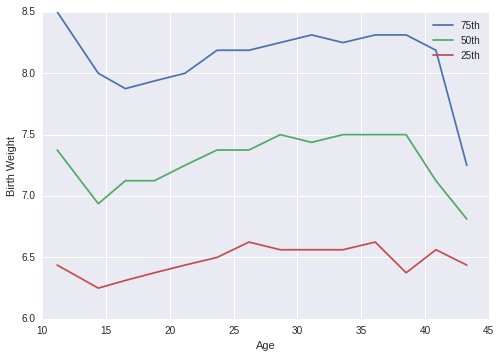

In [8]:
labels = []
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    labels.append('%dth' % percent)
    plt.plot(ages, weights)
plt.legend(labels)
plt.xlabel('Age')
plt.ylabel('Birth Weight')

In [9]:
print 'Pearson: ' + str(thinkstats2.Corr(m_age, weight))
print 'Spearman: ' + str(thinkstats2.SpearmanCorr(m_age, weight))

Pearson: 0.0688339703541
Spearman: 0.0946100410966


There seems to be a very lose relationship, one that is possibly not linear. Generally, the older the mother, the heavier her baby. However, it is possible that at a certain point, if a mother is very old, the child is likely to be very light. This data is also being affected heavily by an outlier on the right end of the graph, where an old mother gave birth to a very light child. Age is a better predictor of rank than it is absolute weight.